# Features Analysis (step 2)

In [1]:
"""
NOTE: to run notebook use: venv/bin/python manage.py shell_plus --notebook
"""

import dask.dataframe as ddf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### un-pre-processed data
#FEATS_PATH = "/Users/erotundo/PycharmProjects/DatasetAnnotatorProj/Analysis/Data/travel/preprocessed_threads_acceptedOnly_ansCountGte2_binaryBestAnswer/"
#meta_cols = ['best-answer', 'thread-id', 'post-id', 'Unnamed: 0', 'index']
### pre-processed
FEATS_PATH = "/Users/erotundo/PycharmProjects/DatasetAnnotatorProj/Analysis/Data/travel/preprocessed_threads_acceptedOnly_ansCountGte2_binaryBestAnswer/"
meta_cols = ['best-answer', 'thread-id', 'post-id', 'Unnamed: 0', 'Unnamed: 0.1', 'index']

# plotting settings
sns.set(style="white", palette="muted", color_codes=True)
PLOTS_PATH = 'output/travel/'
PLOTS_FORMATS = ['.pdf', '.png']

In [2]:
df_feats = ddf.read_csv(FEATS_PATH + 'development-*.csv', encoding='utf-8')
df_feats = df_feats.rename(columns=dict(zip(df_feats.columns, [col.replace("_", "-") for col in df_feats.columns]))).compute()
df_feats = df_feats.rename(columns=dict(zip(df_feats.columns, [ col.replace("cooccurrence", "COOCN") if "cooccurrence" in col else col for col in df_feats.columns])))

In [3]:
df_feats.head()

,Unnamed: 0,Unnamed: 0.1,ABAN-hits-authority,ABAN-hits-hubs,ABAN-indegree,ABAN-pagerank,ABAWN-hits-authority,ABAWN-hits-hubs,ABAWN-indegree,ABAWN-pagerank,...,ty-sipc,ty-slp,ty-sp,ty-spr,ty-sscc,ty-typo,best-answer,thread-id,index,post-id
0,0,-0.964126,-0.121850,-0.121360,-0.084507,0.239048,-0.120732,-0.117732,-0.084507,0.338281,...,0.0,-0.018182,0.0,0.0,0.0,0.0,1.0,1.0,0.0,393.0
1,1,-0.959641,13.012693,23.032378,7.472852,6.883439,14.185310,24.259391,7.472852,6.443810,...,0.0,0.718182,0.0,0.0,0.0,3.0,0.0,1.0,1.0,1787.0
2,2,-0.955157,0.168555,-0.036012,-0.048290,-0.076367,0.315585,-0.002381,-0.048290,-0.067486,...,0.0,-0.718182,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2022.0
3,3,-0.950673,-0.101820,0.000000,-0.130783,-0.108061,-0.102447,0.000000,-0.130783,-0.107959,...,0.0,1.336364,0.0,0.0,0.0,0.0,0.0,1.0,3.0,7267.0
4,4,-0.946188,-0.126548,-0.121360,-0.132797,-0.062238,-0.126365,-0.117732,-0.132797,-0.069510,...,0.0,0.545455,0.0,0.0,0.0,0.0,1.0,5.0,4.0,770.0


## Collinearity

In [4]:
CORR_METHOD = 'Pearson'

# Compute the correlation matrix
corr = df_feats.drop(meta_cols, axis=1).corr(method=CORR_METHOD.lower())

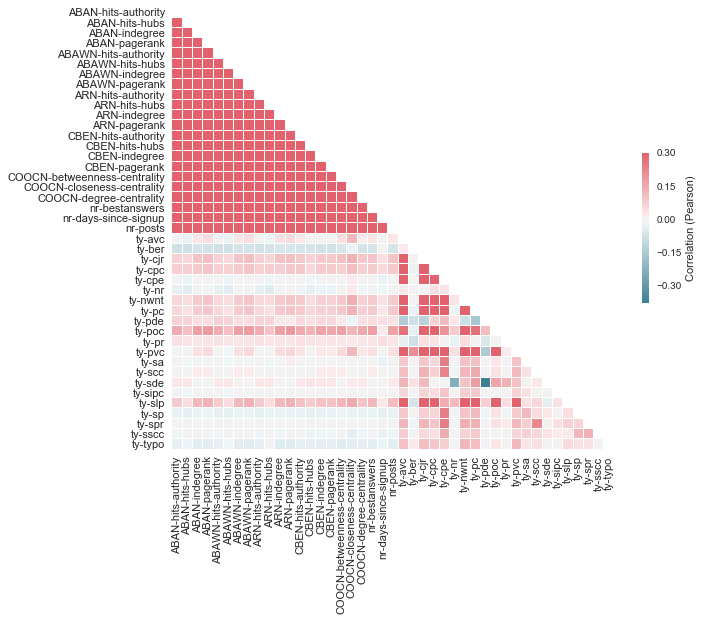

In [5]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
hm = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=0.1, cbar_kws={"shrink": .3, 'label': 'Correlation ({})'.format(CORR_METHOD)})
hm.set(xticklabels=corr.columns.values, yticklabels=corr.columns)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.tight_layout(pad=0.1)

for plot_format in PLOTS_FORMATS: 
    plt.savefig(PLOTS_PATH + 'feats_collinearity_{}'.format(CORR_METHOD) + plot_format)

## Variance

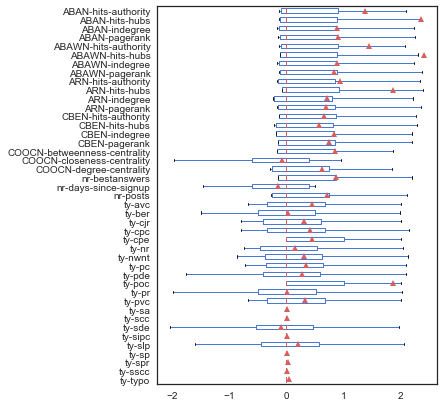

In [6]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5.5))

df_bxplt = df_feats.drop(meta_cols, axis=1)

# reverse cols order
df_bxplt[df_bxplt.columns[::-1]].boxplot(vert=False, 
                                         showfliers=False, 
                                         showmeans=True)

plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(alpha=0)
plt.tight_layout(pad=0.1)

for plot_format in PLOTS_FORMATS: 
    plt.savefig(PLOTS_PATH + 'feats_variance' + plot_format)

In [8]:
# Set up the matplotlib figure
#fig, ax = plt.subplots()


df_bxplt = df_feats.drop(meta_cols, axis=1)
# reverse cols order
df_bxplt = df_bxplt[df_bxplt.columns[::-1]]

for colname, col in df_bxplt.iteritems():
    df_bxplt[[colname]].plot.hist(bins=100, figsize=(4, 3))
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.grid(alpha=0)
    plt.tight_layout(pad=0.1)
    plt.savefig(PLOTS_PATH + 'histograms/feats_histograms_' + colname + '.pdf')
    plt.clf()